In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    nearest_city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = nearest_city.city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country = nearest_city.country_code
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

660

In [3]:
len(countries) #check that countries list length matches up to cities list length

660

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="
reference= requests.get(url+"astana"+","+"kz").json() # using as reference
pprint(reference)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.13, 'lon': 71.43},
 'dt': 1538614800,
 'id': 1526273,
 'main': {'humidity': 74,
          'pressure': 1025,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 'name': 'Astana',
 'sys': {'country': 'KZ',
         'id': 7193,
         'message': 0.0039,
         'sunrise': 1538615949,
         'sunset': 1538657162,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 6.71}}


In [5]:
weather_data = pd.DataFrame({"City":cities, "Country Code":countries})
headings = ["City ID", "Latitude", "Max Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
for x in headings:
    weather_data[x]=""
    weather_data[[x]]=weather_data[[x]].apply(pd.to_numeric, errors='coerce')
weather_data["Date"]=""
weather_data.dtypes

City                    object
Country Code            object
City ID                float64
Latitude               float64
Max Temperature (F)    float64
Humidity (%)           float64
Cloudiness (%)         float64
Wind Speed (mph)       float64
Date                    object
dtype: object

In [6]:
for index, row in weather_data.iterrows():
    #get city name from data frame
    city_name = row["City"]
    
    #get country code from data frame
    country_code = row["Country Code"]
    
    #make API request
    response = requests.get(url+city_name+","+country_code).json()
    
    try: # if city is in open weather map api then... 
        print(f"Retrieving results for {city_name},{country_code}, city id: {response['id']}.") # print which city you are retriving results for
        
        weather_data.loc[index, "City ID"] = response['id'] # add city id to data frame
        weather_data.loc[index, "Latitude"] = response['coord']['lat'] #add latitude to data frame
        weather_data.loc[index, "Max Temperature (F)"] = response['main']['temp_max'] # add temp to df
        weather_data.loc[index, "Humidity (%)"] = response['main']['humidity'] # add humidity to df
        weather_data.loc[index, "Cloudiness (%)"] = response['clouds']['all'] # add cloudiness to df
        weather_data.loc[index, "Wind Speed (mph)"] = response['wind']['speed'] #add wind speed to df
        weather_data.loc[index, "Date"] = response['dt'] # add Time of data calculation, unix, UTC
        
    except (KeyError, IndexError):  # if city is not in open weather map api, then..
        print("Missing field/result... skipping.") # print that it is not found, and that we are skipping it
    
    print("------------") #seperation between cities, easier to read

Missing field/result... skipping.
------------
Retrieving results for khalkhal,ir, city id: 128008.
------------
Retrieving results for carnarvon,za, city id: 1014034.
------------
Retrieving results for avarua,ck, city id: 4035715.
------------
Retrieving results for bogorodskoye,ru, city id: 2126638.
------------
Retrieving results for batticaloa,lk, city id: 1250161.
------------
Retrieving results for kodiak,us, city id: 4407665.
------------
Missing field/result... skipping.
------------
Retrieving results for shakawe,bw, city id: 933077.
------------
Retrieving results for faanui,pf, city id: 4034551.
------------
Missing field/result... skipping.
------------
Retrieving results for east london,za, city id: 1006984.
------------
Retrieving results for dikson,ru, city id: 1507390.
------------
Retrieving results for takoradi,gh, city id: 2294915.
------------
Retrieving results for chokurdakh,ru, city id: 2126123.
------------
Retrieving results for castro,cl, city id: 3896218.
--

Retrieving results for lamar,us, city id: 5427957.
------------
Retrieving results for waingapu,id, city id: 1622318.
------------
Retrieving results for pangnirtung,ca, city id: 6096551.
------------
Retrieving results for fortuna,us, city id: 5563839.
------------
Missing field/result... skipping.
------------
Retrieving results for mountain home,us, city id: 5601615.
------------
Retrieving results for adrar,dz, city id: 2508813.
------------
Missing field/result... skipping.
------------
Retrieving results for cockburn town,bs, city id: 3572627.
------------
Missing field/result... skipping.
------------
Retrieving results for jertih,my, city id: 1736405.
------------
Retrieving results for behshahr,ir, city id: 140918.
------------
Retrieving results for yulara,au, city id: 6355222.
------------
Missing field/result... skipping.
------------
Retrieving results for atuona,pf, city id: 4020109.
------------
Retrieving results for lubango,ao, city id: 3347762.
------------
Retrieving

Retrieving results for evensk,ru, city id: 2125693.
------------
Retrieving results for cabo san lucas,mx, city id: 3985710.
------------
Retrieving results for verkhnyaya inta,ru, city id: 1487332.
------------
Retrieving results for canon city,us, city id: 5514709.
------------
Retrieving results for asadabad,af, city id: 1148311.
------------
Retrieving results for brae,gb, city id: 2654970.
------------
Retrieving results for grants pass,us, city id: 5729080.
------------
Retrieving results for malaut,in, city id: 1264138.
------------
Missing field/result... skipping.
------------
Retrieving results for nome,us, city id: 4732862.
------------
Retrieving results for saint george,bm, city id: 3573061.
------------
Retrieving results for san patricio,mx, city id: 3985168.
------------
Retrieving results for kaoma,zm, city id: 913323.
------------
Retrieving results for shimanovsk,ru, city id: 2016701.
------------
Retrieving results for nhulunbuy,au, city id: 2064735.
------------
Re

Retrieving results for turayf,sa, city id: 101312.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for qasigiannguit,gl, city id: 3420768.
------------
Retrieving results for sorong,id, city id: 1626542.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for mercedes,ar, city id: 3430709.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for comodoro rivadavia,ar, city id: 3860443.
------------
Retrieving results for mahibadhoo,mv, city id: 1337605.
------------
Retrieving results for bubaque,gw, city id: 2374583.
------------
Retrieving results for awjilah,ly, city id: 88533.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for joanopolis,br, city id: 3459855.
------------
Retrieving 

Retrieving results for villa carlos paz,ar, city id: 3832791.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for bukama,cd, city id: 217834.
------------
Retrieving results for marienburg,sr, city id: 3383570.
------------
Missing field/result... skipping.
------------
Retrieving results for foumban,cm, city id: 2231506.
------------
Retrieving results for hofn,is, city id: 2630299.
------------
Retrieving results for itarema,br, city id: 3393692.
------------
Retrieving results for luena,ao, city id: 3347719.
------------
Retrieving results for newcastle,ie, city id: 2965353.
------------
Retrieving results for altea,es, city id: 2521804.
------------
Retrieving results for la rioja,ar, city id: 3848950.
------------
Retrieving results for bahia blanca,ar, city id: 3865086.
------------
Retrieving results for dudinka,ru, city id: 1507116.
------------
Retrievin

Missing field/result... skipping.
------------
Retrieving results for algete,es, city id: 3130383.
------------
Retrieving results for elko,us, city id: 5703670.
------------
Retrieving results for nakamura,jp, city id: 1856057.
------------
Retrieving results for kurunegala,lk, city id: 1237980.
------------
Missing field/result... skipping.
------------
Retrieving results for tevriz,ru, city id: 1489661.
------------
Retrieving results for sturgis,us, city id: 5769489.
------------
Retrieving results for ceres,za, city id: 3369129.
------------
Retrieving results for gao,ml, city id: 2457163.
------------
Retrieving results for nishihara,jp, city id: 1850144.
------------
Retrieving results for wanning,cn, city id: 1791779.
------------
Retrieving results for lima,pe, city id: 3936456.
------------
Retrieving results for tsabong,bw, city id: 932987.
------------


In [7]:
weather_data.head() # check that data was correctly added

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,amderma,ru,NaN,NaN,NaN,NaN,NaN,NaN,
1,khalkhal,ir,128008.0,37.62,43.16,78.0,8.0,1.59,1538617078
2,carnarvon,za,1014034.0,-30.97,37.13,72.0,0.0,9.64,1538617079
3,avarua,ck,4035715.0,-21.21,77.00,47.0,40.0,13.87,1538614800
4,bogorodskoye,ru,2126638.0,52.37,54.77,56.0,0.0,7.63,1538617079


In [8]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit='s') #convert UNIX to readable date
weather_data.head()

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,amderma,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,khalkhal,ir,128008.0,37.62,43.16,78.0,8.0,1.59,2018-10-04 01:37:58
2,carnarvon,za,1014034.0,-30.97,37.13,72.0,0.0,9.64,2018-10-04 01:37:59
3,avarua,ck,4035715.0,-21.21,77.00,47.0,40.0,13.87,2018-10-04 01:00:00
4,bogorodskoye,ru,2126638.0,52.37,54.77,56.0,0.0,7.63,2018-10-04 01:37:59


In [9]:
weather_data.count() # check for missing values

City                   660
Country Code           660
City ID                554
Latitude               554
Max Temperature (F)    554
Humidity (%)           554
Cloudiness (%)         554
Wind Speed (mph)       554
Date                   554
dtype: int64

In [10]:
clean_weather_data = weather_data.dropna(how="any")
clean_weather_data.count() # check that they've been dropped

City                   554
Country Code           554
City ID                554
Latitude               554
Max Temperature (F)    554
Humidity (%)           554
Cloudiness (%)         554
Wind Speed (mph)       554
Date                   554
dtype: int64

In [11]:
clean_weather_data.head()

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
1,khalkhal,ir,128008.0,37.62,43.16,78.0,8.0,1.59,2018-10-04 01:37:58
2,carnarvon,za,1014034.0,-30.97,37.13,72.0,0.0,9.64,2018-10-04 01:37:59
3,avarua,ck,4035715.0,-21.21,77.00,47.0,40.0,13.87,2018-10-04 01:00:00
4,bogorodskoye,ru,2126638.0,52.37,54.77,56.0,0.0,7.63,2018-10-04 01:37:59
5,batticaloa,lk,1250161.0,7.71,81.95,100.0,32.0,6.17,2018-10-04 01:37:59


In [12]:
clean_weather_data.to_csv(output_data_file, encoding='utf-8', index=False) # save dataframe to csv file

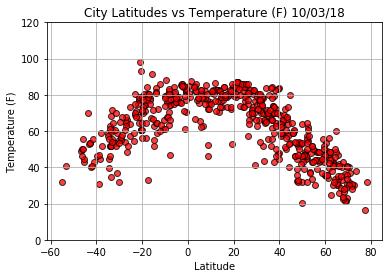

In [13]:
latitudes = clean_weather_data['Latitude']
temp = clean_weather_data['Max Temperature (F)']
hum = clean_weather_data['Humidity (%)']
cloud = clean_weather_data['Cloudiness (%)']
ws = clean_weather_data['Wind Speed (mph)']

# Latitudes Vs Temp plot

TempvLat_plt = plt.scatter(latitudes, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Temperature (F) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,120)

# Save Figure
TempvLat = plt.gcf()
plt.show
TempvLat.savefig("Images/City Latitudes vs Temperature(F).png", bbox_inches="tight")

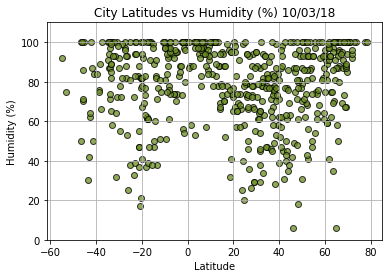

In [14]:
# Latitudes Vs Humidity plot

HumvLat_plt = plt.scatter(latitudes, hum, marker="o", facecolors="olivedrab", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Humidity (%) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)

# Save Figure
HumvLat = plt.gcf()
plt.show
HumvLat.savefig("Images/City Latitudes vs Humidity(%).png", bbox_inches="tight")

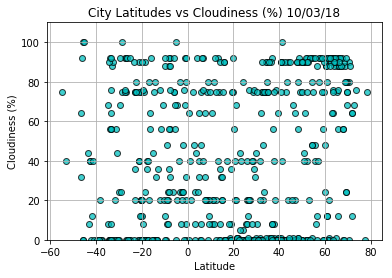

In [15]:
# Latitudes Vs Cloudiness plot

HumvLat_plt = plt.scatter(latitudes, cloud, marker="o", facecolors="c", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Cloudiness (%) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,110)

# Save Figure
CloudvLat = plt.gcf()
plt.show
CloudvLat.savefig("Images/City Latitudes vs Cloudiness(%).png", bbox_inches="tight")

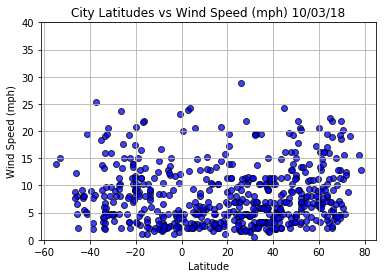

In [16]:
# Latitudes Vs Wind Speed plot

HumvLat_plt = plt.scatter(latitudes, ws, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Wind Speed (mph) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)

# Save Figure
WSvLat = plt.gcf()
plt.show
WSvLat.savefig("Images/City Latitudes vs Wind Speed(mph).png", bbox_inches="tight")